In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('churn_data.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,2023-12-05,5,Website,1
2,3,18,M,Single,Low,2023-11-15,3,Website,0
3,4,21,M,Widowed,Low,2023-08-25,2,Website,0
4,5,21,M,Divorced,Medium,2023-10-27,41,Website,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      1000 non-null   int64 
 1   Age             1000 non-null   int64 
 2   Gender          1000 non-null   object
 3   MaritalStatus   1000 non-null   object
 4   IncomeLevel     1000 non-null   object
 5   LastLoginDate   1000 non-null   object
 6   LoginFrequency  1000 non-null   int64 
 7   ServiceUsage    1000 non-null   object
 8   ChurnStatus     1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [6]:
df.drop('CustomerID', axis=1, inplace=True)

In [7]:
df.drop('LastLoginDate', axis=1, inplace=True)

In [8]:
df.head()

,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage,ChurnStatus
0,62,M,Single,Low,34,Mobile App,0
1,65,M,Married,Low,5,Website,1
2,18,M,Single,Low,3,Website,0
3,21,M,Widowed,Low,2,Website,0
4,21,M,Divorced,Medium,41,Website,0


In [9]:
X = df.drop(['ChurnStatus'],axis=1)
y = df['ChurnStatus']

In [10]:
X.head()

,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage
0,62,M,Single,Low,34,Mobile App
1,65,M,Married,Low,5,Website
2,18,M,Single,Low,3,Website
3,21,M,Widowed,Low,2,Website
4,21,M,Divorced,Medium,41,Website


In [11]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: ChurnStatus, dtype: int64

In [12]:
custom_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
X['IncomeLevel'] = X['IncomeLevel'].map(custom_mapping)

In [13]:
X.head()

,Age,Gender,MaritalStatus,IncomeLevel,LoginFrequency,ServiceUsage
0,62,M,Single,0,34,Mobile App
1,65,M,Married,0,5,Website
2,18,M,Single,0,3,Website
3,21,M,Widowed,0,2,Website
4,21,M,Divorced,1,41,Website


In [14]:
X.isnull().sum()

Age               0
Gender            0
MaritalStatus     0
IncomeLevel       0
LoginFrequency    0
ServiceUsage      0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

# Train-test split: 90% train, 10% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define categorical and numerical columns
cat_features = ['Gender', 'MaritalStatus', 'ServiceUsage']
num_features = ['Age', 'LoginFrequency', 'IncomeLevel']

# Create the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop=None, sparse_output=False), cat_features),
        ('num', StandardScaler(), num_features)
    ],
    remainder='passthrough'  # Keep other columns if present
)

# Fit on training set and transform both train and test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names (works in scikit-learn >= 1.0)
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)


In [17]:
X_train_df.head()

,cat__Gender_F,cat__Gender_M,cat__MaritalStatus_Divorced,cat__MaritalStatus_Married,cat__MaritalStatus_Single,cat__MaritalStatus_Widowed,cat__ServiceUsage_Mobile App,cat__ServiceUsage_Online Banking,cat__ServiceUsage_Website,num__Age,num__LoginFrequency,num__IncomeLevel
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.087164,0.572470,1.196626
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.633823,0.003556,-0.024421
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.633823,-0.138673,-0.024421
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.494317,0.928041,-1.245468
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.560509,-1.347615,-0.024421


In [18]:
X_test_df.head()

,cat__Gender_F,cat__Gender_M,cat__MaritalStatus_Divorced,cat__MaritalStatus_Married,cat__MaritalStatus_Single,cat__MaritalStatus_Widowed,cat__ServiceUsage_Mobile App,cat__ServiceUsage_Online Banking,cat__ServiceUsage_Website,num__Age,num__LoginFrequency,num__IncomeLevel
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.557629,0.145784,-1.245468
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.491437,0.145784,1.196626
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.766207,0.288013,1.196626
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.626701,0.074670,-1.245468
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.153356,1.283612,-1.245468


In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'MLP Neural Net': MLPClassifier(max_iter=1000)
}

In [22]:
# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_df, y_train)
    y_pred = model.predict(X_test_df)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.7700
Decision Tree: Accuracy = 0.6100
Random Forest: Accuracy = 0.7300
Gradient Boosting: Accuracy = 0.7500
SVM: Accuracy = 0.7700
KNN: Accuracy = 0.7100
Naive Bayes: Accuracy = 0.7700
XGBoost: Accuracy = 0.7200
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 181, number of negative: 719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201111 -> initscore=-1.379364
[LightGBM] [Info] Start training from score -1.379364
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Accuracy = 0.7400
MLP Neural Net: Accu

## Hyperparameter

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

param_grid_logreg = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

grid_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

logreg_best = grid_logreg.best_estimator_
logreg_acc = accuracy_score(y_test, logreg_best.predict(X_test))
print("🔹 Logistic Regression Accuracy:", round(logreg_acc, 4))
print("🔹 Best Params:", grid_logreg.best_params_)


🔹 Logistic Regression Accuracy: 0.77
🔹 Best Params: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [24]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', SVC())
])

param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

svm_best = grid_svm.best_estimator_
svm_acc = accuracy_score(y_test, svm_best.predict(X_test))
print("🔹 SVM Accuracy:", round(svm_acc, 4))
print("🔹 Best Params:", grid_svm.best_params_)


🔹 SVM Accuracy: 0.77
🔹 Best Params: {'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}


In [25]:
from sklearn.naive_bayes import GaussianNB

nb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', GaussianNB())
])

param_grid_nb = {
    'model__var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_nb = GridSearchCV(nb_pipeline, param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)

nb_best = grid_nb.best_estimator_
nb_acc = accuracy_score(y_test, nb_best.predict(X_test))
print("🔹 Naive Bayes Accuracy:", round(nb_acc, 4))
print("🔹 Best Params:", grid_nb.best_params_)


🔹 Naive Bayes Accuracy: 0.77
🔹 Best Params: {'model__var_smoothing': 1e-09}


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

logreg_param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

logreg_search = RandomizedSearchCV(
    logreg_pipeline, logreg_param_grid,
    n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

logreg_search.fit(X_train, y_train)
print("🔹 Logistic Regression")
print("Best Params:", logreg_search.best_params_)
y_pred = logreg_search.predict(X_test)
print(classification_report(y_test, y_pred))


🔹 Logistic Regression
Best Params: {'model__solver': 'lbfgs', 'model__penalty': 'l2', 'model__C': 0.001}
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        77
           1       0.00      0.00      0.00        23

    accuracy                           0.77       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.59      0.77      0.67       100



In [27]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC())
])

svm_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

svm_search = RandomizedSearchCV(
    svm_pipeline, svm_param_grid,
    n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

svm_search.fit(X_train, y_train)
print("\n🔹 SVM")
print("Best Params:", svm_search.best_params_)
y_pred = svm_search.predict(X_test)
print(classification_report(y_test, y_pred))



🔹 SVM
Best Params: {'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': 10}
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        77
           1       0.00      0.00      0.00        23

    accuracy                           0.73       100
   macro avg       0.38      0.47      0.42       100
weighted avg       0.59      0.73      0.65       100



In [28]:
from sklearn.naive_bayes import GaussianNB

nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GaussianNB())
])

nb_param_grid = {
    'model__var_smoothing': np.logspace(-9, -1, 10)
}

nb_search = RandomizedSearchCV(
    nb_pipeline, nb_param_grid,
    n_iter=10, cv=5, scoring='f1', random_state=42, n_jobs=-1
)

nb_search.fit(X_train, y_train)
print("\n🔹 Naive Bayes")
print("Best Params:", nb_search.best_params_)
y_pred = nb_search.predict(X_test)
print(classification_report(y_test, y_pred))



🔹 Naive Bayes
Best Params: {'model__var_smoothing': np.float64(1e-09)}
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        77
           1       0.00      0.00      0.00        23

    accuracy                           0.77       100
   macro avg       0.39      0.50      0.44       100
weighted avg       0.59      0.77      0.67       100



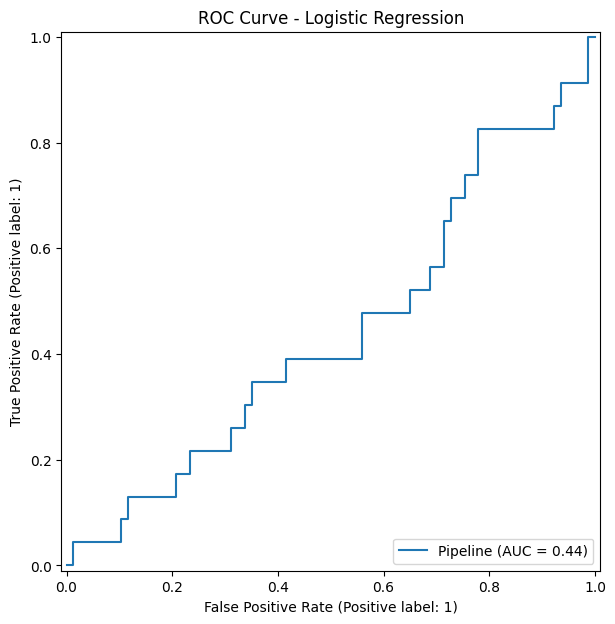

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(7, 7))

roc_curve_display = RocCurveDisplay.from_estimator(
    estimator=grid_logreg.best_estimator_,  # use the best estimator
    X=X_test,
    y=y_test,
    ax=ax
)

plt.title("ROC Curve - Logistic Regression")
plt.show()
